In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Steps:
a. Data Wrangling
1. data cleaning
2. EDA
3. feature engineering
4. feature selection


b. Model Training
5. Model Building
6. Cross Validation and hyper parameter tuning




In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)  #1 row is header
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.0 KB


In [5]:
#we should convert it into int or float values

Data Cleaning

In [6]:
#missinge vvalues
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [8]:
df[df.isnull().any(axis=1)]  #row wise

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


convert dtaset into to parts based on region from 122 index
 and addd new column

In [9]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [10]:
df.info()   #region become float

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    str    
 1   month        245 non-null    str    
 2   year         245 non-null    str    
 3   Temperature  245 non-null    str    
 4    RH          245 non-null    str    
 5    Ws          245 non-null    str    
 6   Rain         245 non-null    str    
 7   FFMC         245 non-null    str    
 8   DMC          245 non-null    str    
 9   DC           245 non-null    str    
 10  ISI          245 non-null    str    
 11  BUI          245 non-null    str    
 12  FWI          245 non-null    str    
 13  Classes      244 non-null    str    
 14  Region       246 non-null    float64
dtypes: float64(1), str(14)
memory usage: 29.0 KB


In [11]:
type([df['Region']])

list

In [12]:
type(df[['Region']])

pandas.DataFrame

In [13]:
df[['Region']]=df[['Region']].astype(int)  #because float take more memory

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
 14  Region       246 non-null    int64
dtypes: int64(1), str(14)
memory usage: 29.0 KB


In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [17]:
#as we have only 1 null record so drop it 
df=df.dropna().reset_index(drop=True)

# dropna-->By default, it drops any row containing at least one missing value (axis=0, how='any')

In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [20]:
# drop 122 index
df=df.drop(122).reset_index(drop=True)

In [21]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='str')

In [23]:
#remove spaces in column name
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='str')

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          243 non-null    str  
 1   month        243 non-null    str  
 2   year         243 non-null    str  
 3   temperature  243 non-null    str  
 4   rh           243 non-null    str  
 5   ws           243 non-null    str  
 6   rain         243 non-null    str  
 7   ffmc         243 non-null    str  
 8   dmc          243 non-null    str  
 9   dc           243 non-null    str  
 10  isi          243 non-null    str  
 11  bui          243 non-null    str  
 12  fwi          243 non-null    str  
 13  classes      243 non-null    str  
 14  region       243 non-null    int64
dtypes: int64(1), str(14)
memory usage: 28.6 KB


In [25]:
#change the required columns as int dtype till Ws
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='str')

In [27]:
df[['day', 'month', 'year', 'temperature', 'rh', 'ws']]=df[['day', 'month', 'year', 'temperature', 'rh', 'ws']].astype(int)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          243 non-null    int64
 1   month        243 non-null    int64
 2   year         243 non-null    int64
 3   temperature  243 non-null    int64
 4   rh           243 non-null    int64
 5   ws           243 non-null    int64
 6   rain         243 non-null    str  
 7   ffmc         243 non-null    str  
 8   dmc          243 non-null    str  
 9   dc           243 non-null    str  
 10  isi          243 non-null    str  
 11  bui          243 non-null    str  
 12  fwi          243 non-null    str  
 13  classes      243 non-null    str  
 14  region       243 non-null    int64
dtypes: int64(7), str(8)
memory usage: 28.6 KB


In [28]:
#changing the other column to float dtype--using list comprehension

obj=[feature for feature in df.columns if df[feature].dtype=='str']

In [29]:
for o in obj:
    if o!='classes':  #classes is categorical column
        df[o]=df[o].astype(float)

In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    str    
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), str(1)
memory usage: 28.6 KB


In [31]:
obj

['rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes']

In [32]:
#save the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset_CLEAN.csv',index=False)

Exploratory Data Analysis

In [33]:

#fwi --> dependent variable (to be predicted)
#other are dependent
#classes--: it can be dependent variable for classification

In [34]:
#drop 'day','month','year'
df_copy=df.drop(['day','month','year'],axis=1)   #0 means that we are selecting rows, 1 means that we are selecting columns.
df_copy.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
#categories in classes
df_copy['classes'].value_counts()

classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [36]:
#Encoding of categories in classes

#df_copy['classes']=np.where(df_copy['classes']=='not fire',0,1)  --->it will search eactly 'not fire' and ignore names with spaces and other categories
df_copy['classes']=np.where(df_copy['classes'].str.contains('not fire'),0,1)
df_copy.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [37]:
df_copy['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'rh'}>, <Axes: title={'center': 'ws'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'ffmc'}>,
        <Axes: title={'center': 'dmc'}>],
       [<Axes: title={'center': 'dc'}>, <Axes: title={'center': 'isi'}>,
        <Axes: title={'center': 'bui'}>],
       [<Axes: title={'center': 'fwi'}>,
        <Axes: title={'center': 'classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

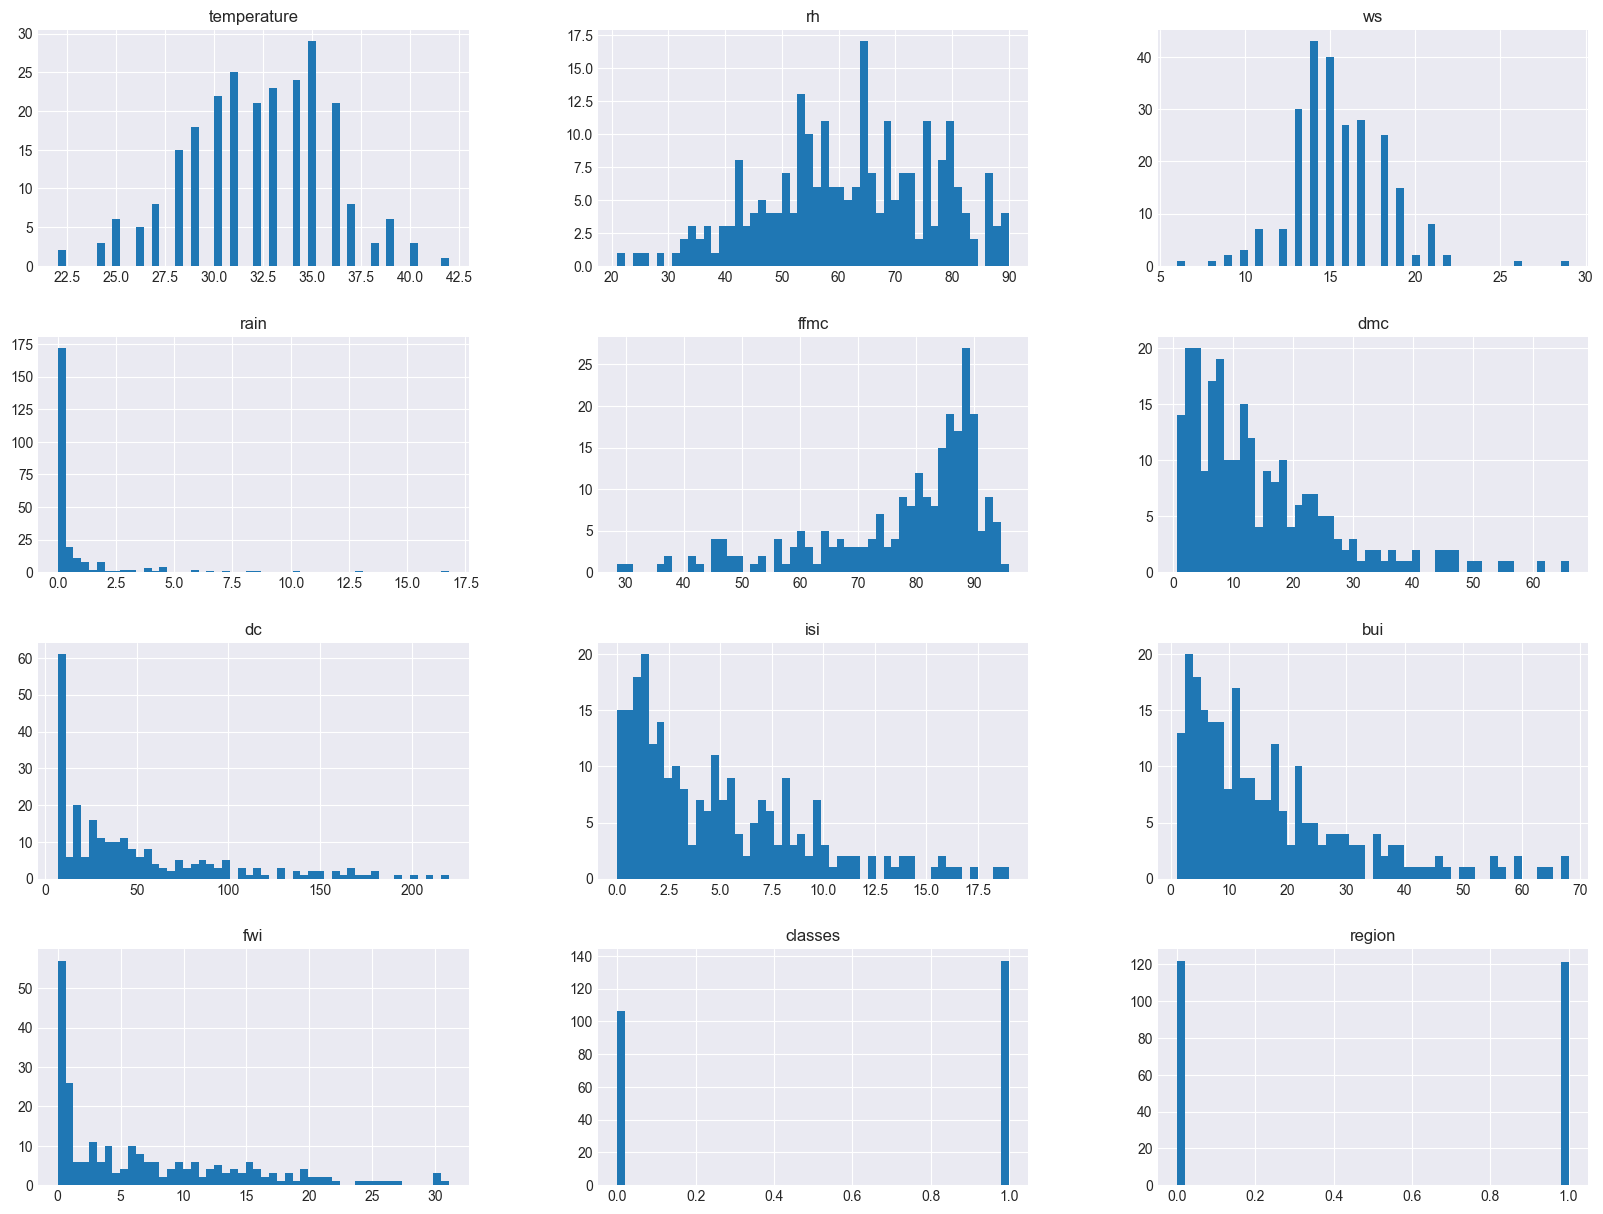

In [38]:
#plot density plot for all features

plt.style.use('seaborn-v0_8-darkgrid')
# in newer versions of Matplotlib (starting from version 3.6), the correct styles to use are specific, versioned names like 'seaborn-v0_8' or 'seaborn-v0_8-darkgrid'
df_copy.hist(bins=50,figsize=(20,15))

In [39]:
#pie chart for classes

percentage=df_copy['classes'].value_counts(normalize=True)*100

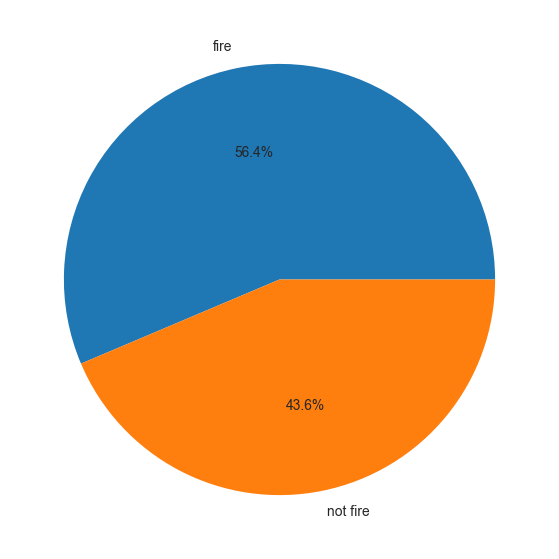

In [40]:
labels = 'fire','not fire'
sizes= percentage
plt.figure(figsize=(12,7))
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
# plt.title('Pie chart of classes')
plt.show()

In [41]:
#correlation

df_copy.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

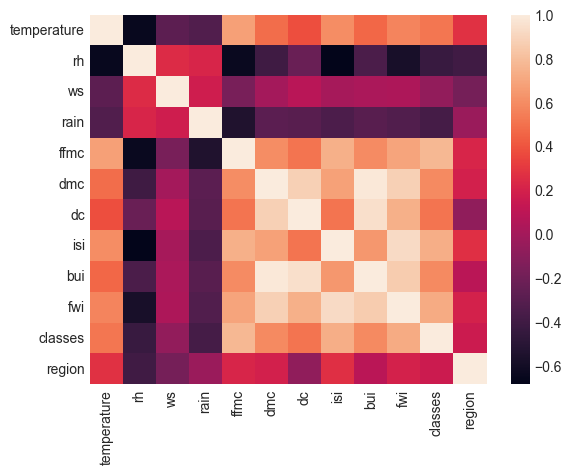

In [42]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='fwi'>

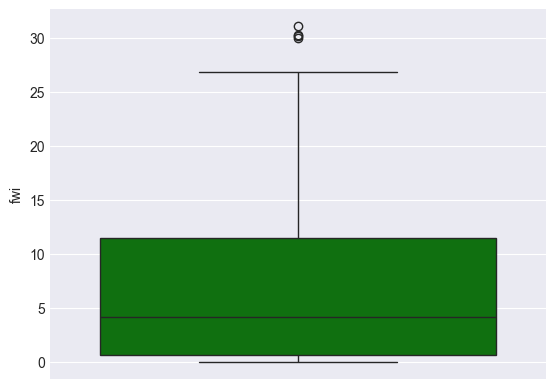

In [43]:
#box plot for fwi
sns.boxplot(df_copy['fwi'],color='g')

In [44]:
#Monthly fire analysis

df['classes']=np.where(df['classes'].str.contains('not fire'),'not fire','fire')
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 0, 'Months')

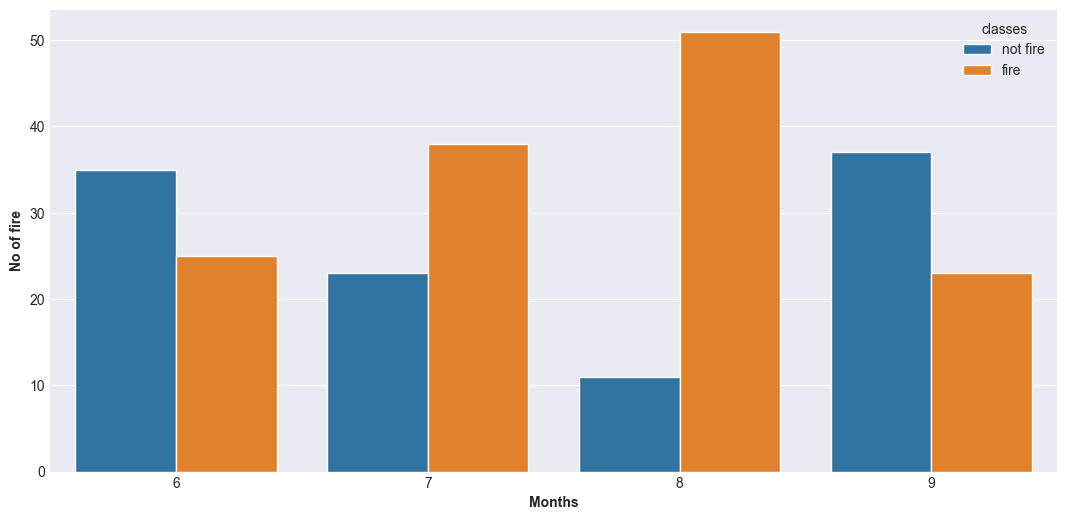

In [45]:

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='classes',data=df)
plt.ylabel('No of fire',weight='bold')
plt.xlabel('Months',weight='bold')

In [46]:
#Monthly fire analysis based on specific region

Text(0.5, 0, 'Months')

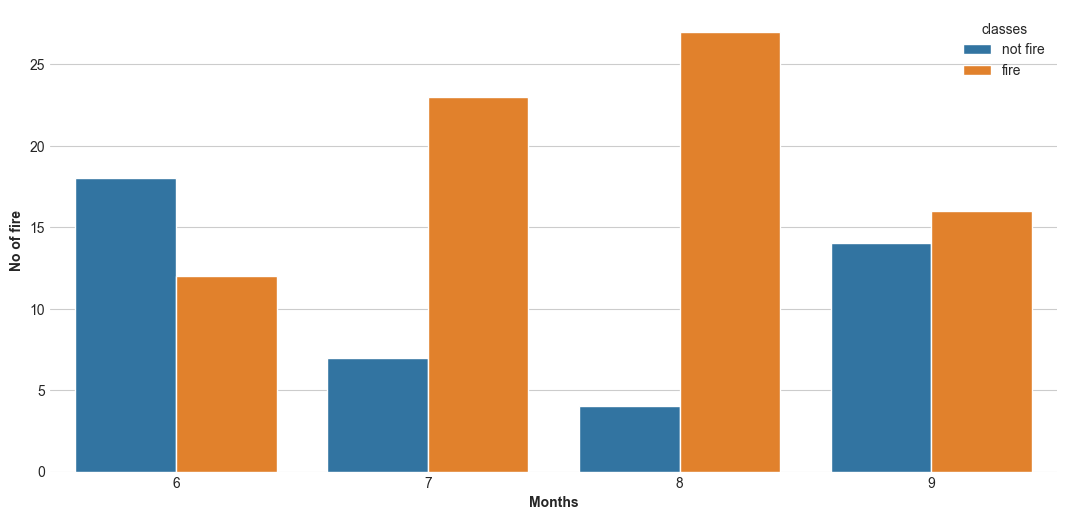

In [47]:
df_temp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='classes',data=df_temp)
plt.ylabel('No of fire',weight='bold')
plt.xlabel('Months',weight='bold')
# plt.title('fire analysis of sidi-bel region',weight='bold')

Text(0.5, 0, 'Months')

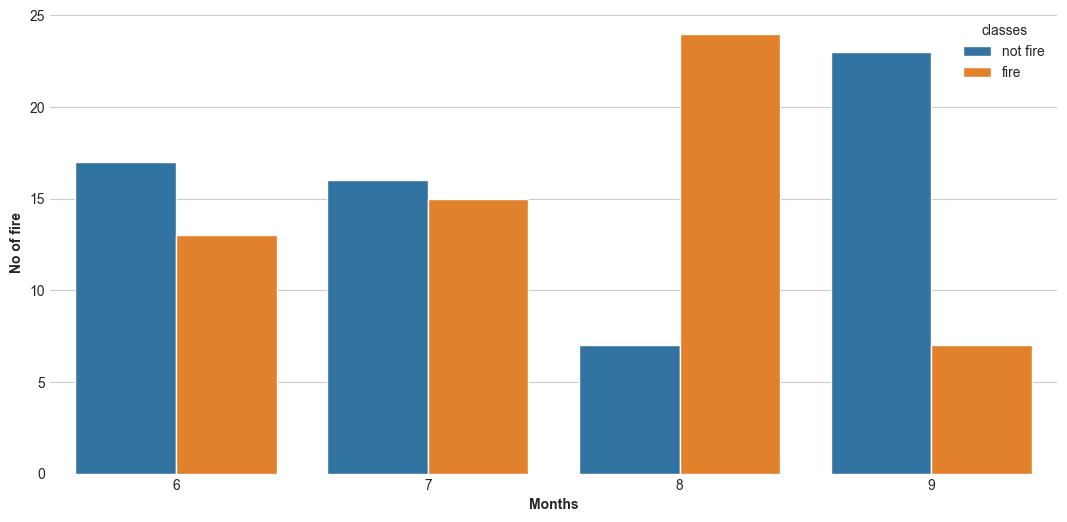

In [48]:
df_temp=df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='classes',data=df_temp)
plt.ylabel('No of fire',weight='bold')
plt.xlabel('Months',weight='bold')
# plt.title('fire analysis of bejaia region',weight='bold')

it is observed that most fires happened in August and mosly happenes in july and august viz summer

In [49]:
df_copy


,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [50]:
df_copy['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [51]:
#independent and dependent features
X=df_copy.drop('fwi',axis=1)
X

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [52]:
y=df_copy['fwi']
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: fwi, Length: 243, dtype: float64

In [53]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [55]:
y_train.shape,y_test.shape

((182,), (61,))

In [56]:
#feature selection based on correlation
X_train.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
rh,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
ffmc,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
dmc,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
dc,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
isi,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
bui,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

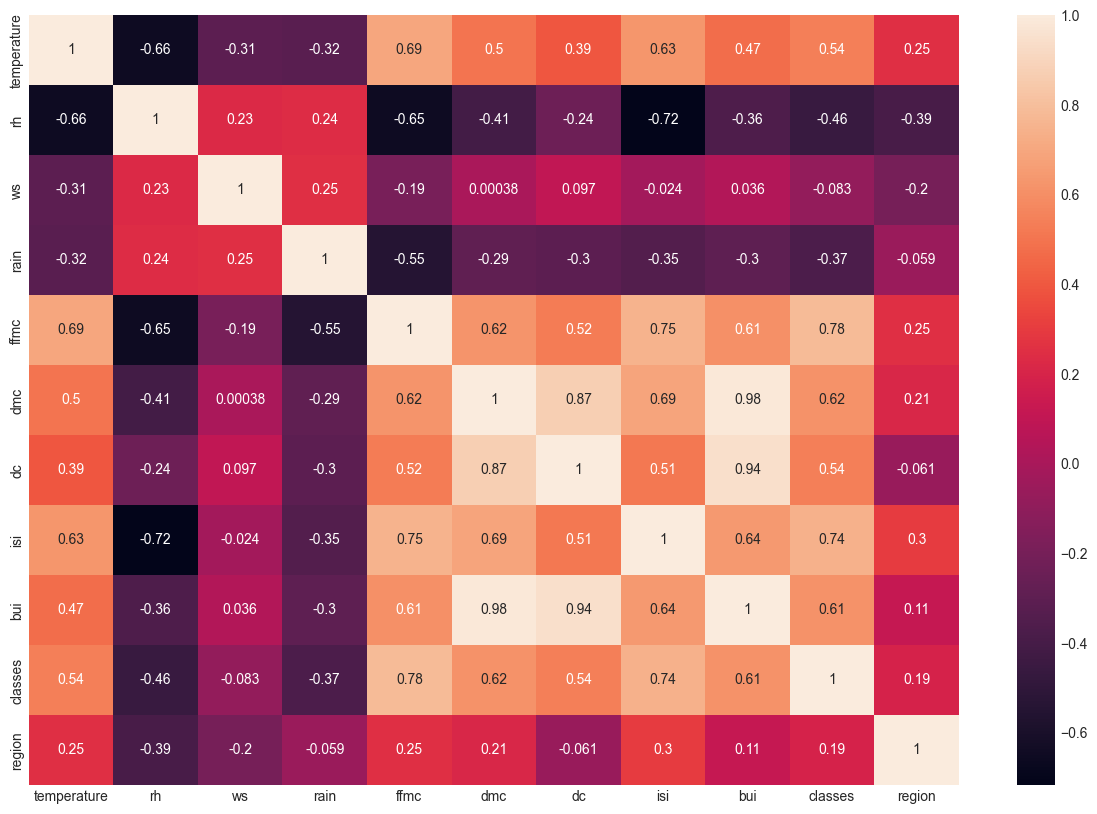

In [57]:
plt.figure(figsize=(15,10))  #5 is width and 10 is height
sns.heatmap(X_train.corr(),annot=True)

In [58]:
#find column names having more correlation than given threshold


def correlation(dataset, threshold):  #thresholh is corr val
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#note--> threshold is set by domain expert


In [59]:
correlation(X_train,0.90)  #here we can delete bui and usedmc and dc instead

{'bui'}

In [60]:
# df_copy.corr()
# len(df_copy.corr().columns)
# df_copy.corr().columns[1]
# s=set()
# s.add(2)
# s.add(3)
# s.add(2)
# s
# for i in range(12):
#     for j in range(i):
#         print('*',end='')
#     print()
# abs(-3*4)
# df_copy.corr().iloc[1,2] #2nd row 3rd column

In [61]:
#drop features whose corrleation is >85%
corr_features=correlation(X_train,0.85) 
corr_features

{'bui', 'dc'}

In [62]:
X_train.drop(corr_features,axis=1,inplace=True)

In [63]:
X_train

,temperature,rh,ws,rain,ffmc,dmc,isi,classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [64]:
X_test.drop(corr_features,axis=1,inplace=True)

In [65]:
X_test

,temperature,rh,ws,rain,ffmc,dmc,isi,classes,region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [66]:
X_train.shape

(182, 9)

In [67]:
X_test.shape

(61, 9)

feature scaling OR Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [69]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [70]:
#Boxplot to understand the effect of standardization

Text(0.5, 1.0, 'After Scaling')

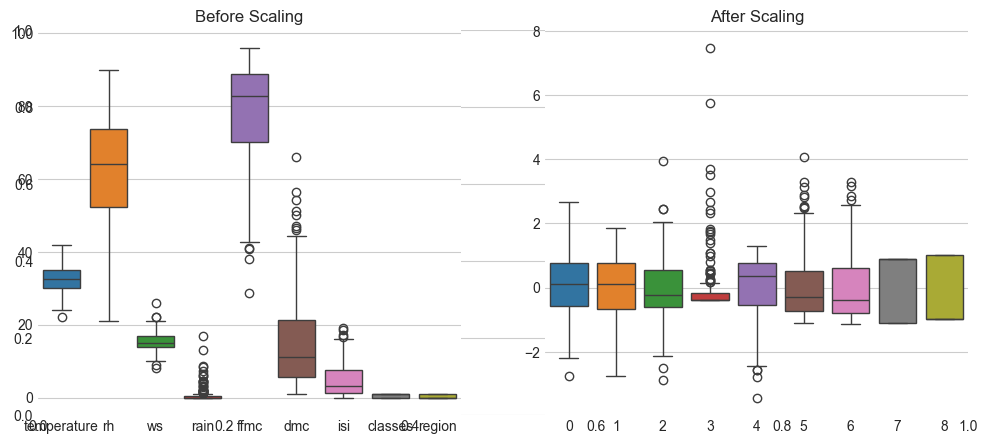

In [71]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)

sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)

sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")

Linear regression

mean absolute error 0.5468236465249978
r2 score: 0.9847657384266951


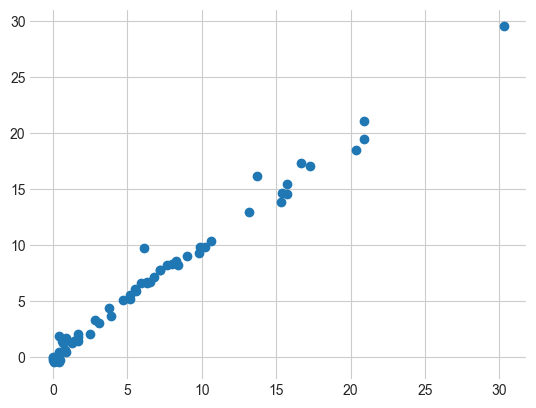

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)

score=r2_score(y_test,y_pred)

print('r2 score:',score)

plt.scatter(y_test,y_pred)  #if it is a linear then its a very good model



Lasso Regression

mean absolute error 1.1331759949144087
r2 score: 0.9492020263112388


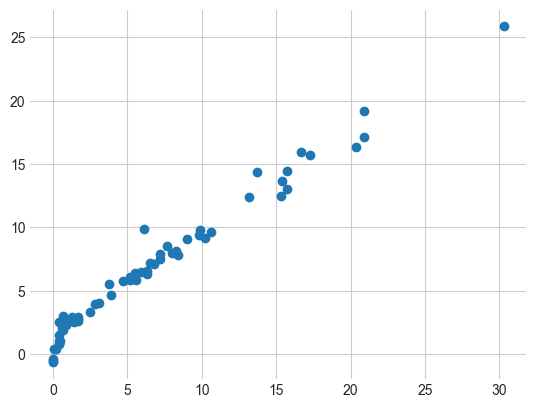

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)

score=r2_score(y_test,y_pred)

print('r2 score:',score)

plt.scatter(y_test,y_pred)



In [74]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [75]:
lassocv.alpha_

np.float64(0.06582808719529475)

In [76]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [77]:
lassocv.mse_path_

array([[54.04680834, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139504, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean absolute error 0.6358894638564663
R2 Score 0.9814406737205228


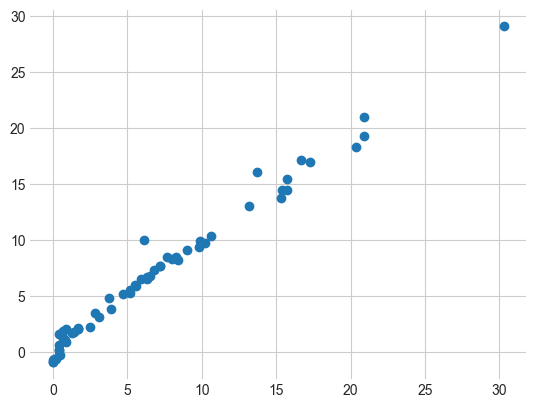

In [78]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Ridge Regression


mean absolute error 0.5642305340105715
r2 score: 0.9842993364555512


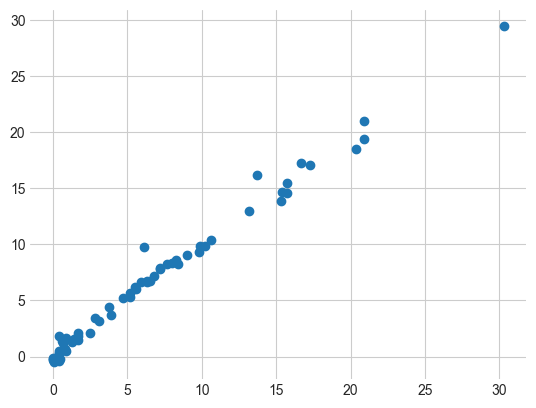

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)

score=r2_score(y_test,y_pred)

print('r2 score:',score)

plt.scatter(y_test,y_pred) 

Mean absolute error 0.5642305340105715
R2 Score 0.9842993364555512


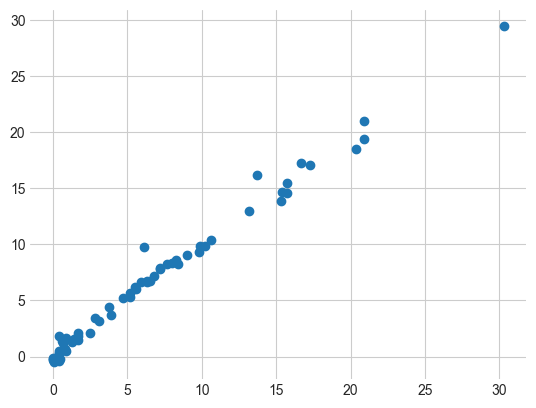

In [80]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [81]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Elastic Net Regression

mean absolute error 1.8822353634895999
r2 score: 0.8753460589519703


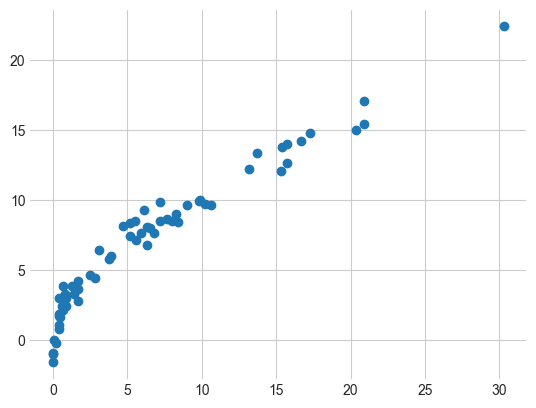

In [82]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)

score=r2_score(y_test,y_pred)

print('r2 score:',score)

plt.scatter(y_test,y_pred) 

Mean absolute error 0.6575946731430901
R2 Score 0.9814217587854941


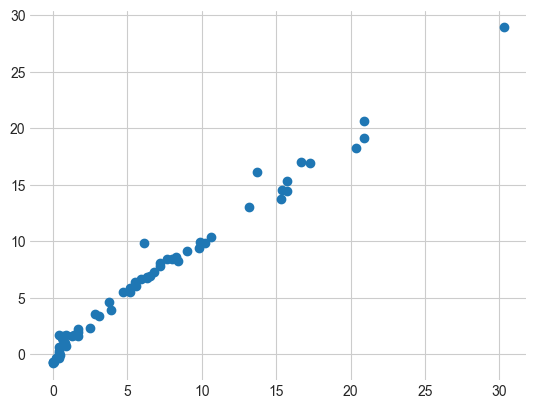

In [83]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [ ]:
#pickle the ml model ,preprocessing models(standardScaler)
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(Scaler,open('scaler.pkl','wb'))


#pickling is for deploying the model in cloud

In [93]:
model=pickle.load(open('ridge.pkl','rb'))

In [94]:
model

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [95]:
model.predict(X_test)

c:\Users\divya\Desktop\Udemy Notes\myenv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([  5.21756555,  -6.52910659, -38.091741  ,  10.63909699,
         6.58596724, -16.91528283, -41.26148601,  20.09034941,
       -25.86868841, -14.18878643, -36.60581713,  78.67218453,
        18.17375394,  91.24547572,  96.12817916, -26.30392698,
        -5.40954743, -33.69090127,  -3.64815389, -24.66897548,
       -42.49583793, -39.87515573, -19.48542522, -39.77789294,
        84.87371805,  -8.17825927,  -7.61152956,  23.70604696,
       -32.50048011,  13.74185531,  -4.72183275, -38.26484891,
        23.21882652,  75.1741669 , -38.91227953, -36.00178231,
       -45.85889918,  10.0606742 , -32.32561638, -32.36849862,
         5.91167658, -34.95668155,  13.14483307, -36.78984154,
        59.48871166,   8.18613948,  23.68594029, -26.11681914,
        51.85427798, -32.8004546 , 214.59794834,  -1.79332823,
        57.70276853, 115.89996311,  36.56098746, 114.02590508,
       -30.40960391,  15.88146645, -25.61380844,  66.31872915,
       -13.30544931])